new note

<code>
TOTALP_PDF1+gumbel_l,5.511633973257439,0.2262071569584096
RADIUS_PDF1+johnsonsb,1.5187255885489825,1.269645240869123,-0.27894731916038973,20.797740488039622
BETPAR_PDF1+exponnorm,8.287219232100437,0.017846553384616465,0.010045344544579145
MAXINT_PDF1+expon,0.10575951772499326,6.995586774590339
AVGDUR_PDF1+geninvgauss,-0.0898831096228784,0.7703680797104097,2.843259631396887,82.07861011421329
COPULA_RHO1+,-0.31622002749035444
WINDIR_PDF1+vonmises,2.836341,0.00001
WSPEED_PDF1+norm,7.55,1.9
DATIME_VMF1+m1,0.2468419551426534,0.6893273101866058,6.418276632248997
DATIME_VMF1+m2,0.3315907829508499,1.703495074238532,3.000253688430609
DATIME_VMF1+m3,0.4215672619064808,2.57569021558914,0.4649344363713587
DOYEAR_VMF1+m1,0.05446271224933757,1.907409236571684,105.3227046311876
DOYEAR_VMF1+m2,0.08954689198507723,0.2286006656480273,51.97011694272198
DOYEAR_VMF1+m3,0.07054990890263783,1.551363989955984,87.19112504916305
DOYEAR_VMF1+m4,0.0873236680883794,1.17264771241493,52.91419173073581
DOYEAR_VMF1+m5,0.6981168187745506,0.5586619737368196,6.828147043994408
</code>

In [2]:
import numpy as np
import pandas as pd

In [4]:
# https://stackoverflow.com/a/58227453/5885810  (import tricky CSV)
file_pdfs = '../model_input/ProbabilityDensityFunctions_TWO.csv'
PDFS = pd.read_fwf( file_pdfs, header=None)
PDFS = PDFS.__getitem__(0).str.split(',', expand=True).set_index( 0 ).astype( 'f8' )
print(PDFS)

                                   1          2           3          4
0                                                                     
TOTALP_PDF1+gumbel_l        5.511634   0.226207         NaN        NaN
TOTALP_PDF2+norm            5.362910   0.316761         NaN        NaN
RADIUS_PDF1+johnsonsb       1.518726   1.269645   -0.278947  20.797740
RADIUS_PDF2+gamma           4.399626  -0.475113    1.399112        NaN
BETPAR_PDF1+exponnorm       8.287219   0.017847    0.010045        NaN
BETPAR_PDF2+burr            2.351236   0.850598   -0.001137   0.083777
MAXINT_PDF1+expon           0.105760   6.995587         NaN        NaN
AVGDUR_PDF1+geninvgauss    -0.089883   0.770368    2.843260  82.078610
MAXINT_PDF1+Z1+expon        0.109404   5.760539         NaN        NaN
MAXINT_PDF1+Z2+expon        0.105760   7.113553         NaN        NaN
MAXINT_PDF1+Z3+expon        0.305323   7.352659         NaN        NaN
AVGDUR_PDF1+Z1+geninvgauss -0.105857   0.609322    5.046340  74.205047
AVGDUR

In [5]:
from scipy import stats

In [6]:
RADIUS = [{'':stats.johnsonsb(1.5187, 1.2696, -0.2789, 20.7977)}, {'':stats.gamma(4.3996, -0.475, 1.399)}]
print(RADIUS)

[{'': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029CCA36E1F0>}, {'': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029CCA37F640>}]


In [7]:
list(map(print, RADIUS))

{'': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029CCA36E1F0>}
{'': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029CCA37F640>}


[None, None]

In [125]:
johns = RADIUS[ 0 ][ '' ]
gamma = RADIUS[ 1 ][ '' ]

np.random.seed( seed=42 )
h_johns = pd.DataFrame( {'dist':'johnsonsb', 'vals':johns.rvs( size=400 )} )
h_gamma = pd.DataFrame( {'dist':'gamma',     'vals':gamma.rvs( size=300 )} )

data = pd.concat([h_johns, h_gamma], ignore_index=True)
print(data)

          dist       vals
0    johnsonsb   3.678668
1    johnsonsb  10.664618
2    johnsonsb   6.581684
3    johnsonsb   5.316964
4    johnsonsb   2.216708
..         ...        ...
695      gamma   8.466893
696      gamma   4.631129
697      gamma   2.597868
698      gamma   6.362148
699      gamma   5.696321

[700 rows x 2 columns]


In [21]:
print(data.vals.max())
print(data.vals.min())

15.955296568429542
0.5236462854105071


In [164]:
_size = 200  # number.of.bins.to.split.the.X.axis
x_min = 0
x_max = 20
s_tep = abs(x_max -x_min) /_size

x_xis = np.linspace(x_min, x_max, num=_size +1, endpoint=True)

d_johns = johns.pdf( x_axis )
d_gamma = gamma.pdf( x_axis )

In [243]:
    # VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update( plt.rcParamsDefault )
plt.rcParams['font.family'] = 'Trebuchet MS', 'Impact', 'Candara', 'Papyrus'

<Figure size 640x480 with 0 Axes>

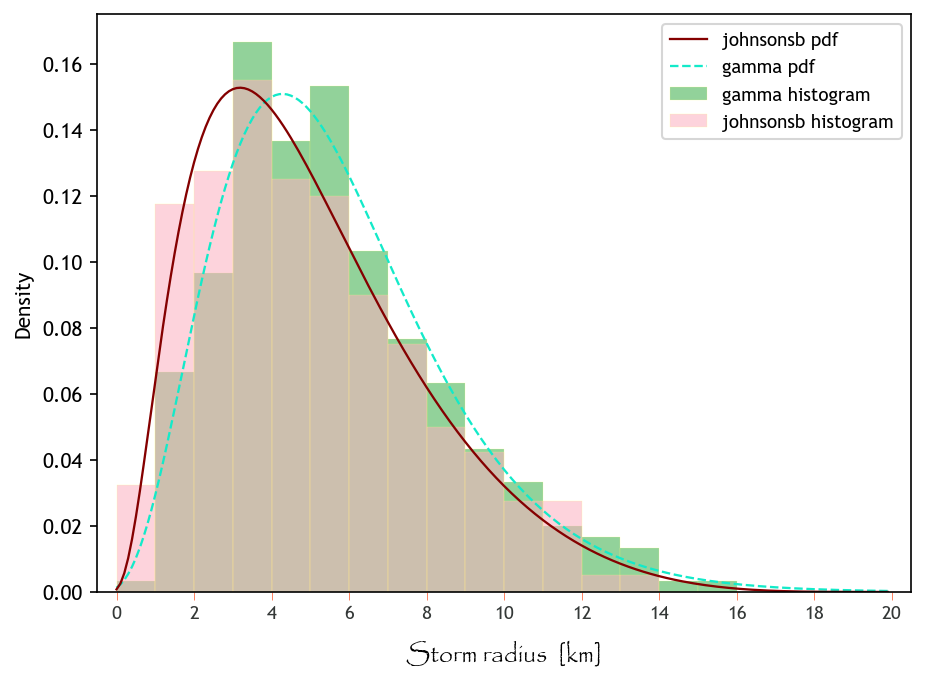

In [244]:
#-comparing the DISCRETE-fitting approach against the CIRCULAR-MvMF-pdfs for DOY
#-------------------------------------------------------------------------------

binw = 1
xbin = np.linspace(x_min, x_max, num=int(abs(x_max -x_min) /binw +1), endpoint=True)
xlab = np.linspace(x_min, x_max, num=10+1, endpoint=True)

fig, ax = plt.subplots(figsize=(7,5), dpi=150)

sns.histplot(data=data, x='vals', hue='dist', stat='density', ax=ax, multiple='layer', alpha=0.55, bins=xbin, #binwidth=binw
             element='bars', fill=True, edgecolor='xkcd:banana', linewidth=.1, palette={'johnsonsb':'xkcd:soft pink','gamma':'xkcd:medium green'},
             common_norm=False, zorder=0)

ax.plot(x_axis, d_johns, color='xkcd:dark red',  lw=1.1, ls='solid', zorder=2)
ax.plot(x_axis, d_gamma, color='xkcd:aqua', lw=1.1, ls='dashed', zorder=1)
# use this if stat=='probability'
#ax.plot(x_axis, d_johns/d_johns.sum() *binw/s_tep, color='xkcd:dark red',  lw=1.1, ls='solid', zorder=2)
#ax.plot(x_axis, d_gamma/d_gamma.sum() *binw/s_tep, color='xkcd:aqua', lw=1.1, ls='dashed', zorder=1)

ax.legend(labels=['johnsonsb pdf','gamma pdf','gamma histogram','johnsonsb histogram'], loc='upper right', fontsize=9)

ax.set_xticks( xlab )
# turn xlabs into integer-strings
ax.set_xticklabels(labels=[str(int( x )) for x in xlab], fontdict={'size':9,'color':'xkcd:charcoal'})
ax.tick_params(axis='x', which='major', direction='out', pad=+2, color='xkcd:red orange', length=4, width=0.3)
ax.set_xlim([x_min -.5, x_max +.5])
plt.xlabel(r'Storm radius  [km]', fontsize=12, color='xkcd:black', labelpad=9, fontname='Papyrus')

## activate this block for more fun-control
#ax.set_yticks( np.linspace(0, 0.16, 5), minor=False)
#ax.tick_params(axis='y', which='major', direction='in', pad=1.5, color='xkcd:charcoal', labelcolor='xkcd:charcoal', labelsize=11, length=3)
#plt.ticklabel_format(axis='y', style='sci', scilimits=(1,-2))
## doing minor ticks
#ax.set_yticks(np.linspace(0, 0.17, 18), labels=None, minor=True)
#ax.tick_params(axis='y', which='minor', direction='in', color='xkcd:charcoal', length=1.5, width=0.5)
#ax.set_ylim([0, 0.17])
#plt.ylabel('density  [-]', fontsize=12, color='xkcd:black', labelpad=13)

# plt.title('some unnecessary title')

plt.show()
# plt.savefig('fig_xx.jpg', bbox_inches='tight',pad_inches=0.02,facecolor=fig.get_facecolor())
plt.close()
plt.clf()